In [16]:
import re
import numpy as np
import pandas as pd

In [17]:
train = pd.read_csv(r'C:\Users\Asus\Desktop\Data_mining_Project\train_0irEZ2H.csv')
test = pd.read_csv(r'C:\Users\Asus\Desktop\Data_mining_Project\test_nfaJ3J5.csv')
submission=pd.read_csv(r'C:\Users\Asus\Desktop\Data_mining_Project\sample_submission_pzljTaX.csv')

In [18]:
train['week'] =  pd.to_datetime(train['week'], format='%d/%m/%y')
test['week'] =  pd.to_datetime(test['week'], format='%d/%m/%y')

In [19]:
train.isnull().sum()

record_ID          0
week               0
store_id           0
sku_id             0
total_price        1
base_price         0
is_featured_sku    0
is_display_sku     0
units_sold         0
dtype: int64

In [20]:
test.isnull().sum()

record_ID          0
week               0
store_id           0
sku_id             0
total_price        0
base_price         0
is_featured_sku    0
is_display_sku     0
dtype: int64

In [21]:
# Replacing null value with mean
train.fillna({'total_price':train['total_price'].mean()}, inplace=True)

In [22]:
X = train.drop(['units_sold','week'], axis=1)  # Features
y = train['units_sold']  # Target variable

In [23]:
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# Select the features and target variable
features = ['total_price', 'base_price', 'is_featured_sku', 'is_display_sku']
target = 'units_sold'

# Create a weekly dataset by aggregating sales data
weekly_data = train.groupby(['week', 'store_id', 'sku_id'])[features + [target]].mean().reset_index()

# Extract the features and target variable
X = weekly_data[features]
y = weekly_data[target]

# Extract the features and target variable from the training data
X_train = train[features]
y_train = train[target]

# Initialize the Decision Tree Regression model
model = DecisionTreeRegressor(random_state=42)  # You can set different hyperparameters here

# Train the model on the training data
model.fit(X_train, y_train)



DecisionTreeRegressor(random_state=42)

In [24]:
# coverting data from object datatype to datetime datatype
train['week'] = pd.to_datetime(train['week'])
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150150 entries, 0 to 150149
Data columns (total 9 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   record_ID        150150 non-null  int64         
 1   week             150150 non-null  datetime64[ns]
 2   store_id         150150 non-null  int64         
 3   sku_id           150150 non-null  int64         
 4   total_price      150150 non-null  float64       
 5   base_price       150150 non-null  float64       
 6   is_featured_sku  150150 non-null  int64         
 7   is_display_sku   150150 non-null  int64         
 8   units_sold       150150 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(6)
memory usage: 10.3 MB


In [25]:
train['week'] = pd.to_datetime(train['week']).dt.to_period("W")

In [11]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150150 entries, 0 to 150149
Data columns (total 9 columns):
 #   Column           Non-Null Count   Dtype        
---  ------           --------------   -----        
 0   record_ID        150150 non-null  int64        
 1   week             150150 non-null  period[W-SUN]
 2   store_id         150150 non-null  int64        
 3   sku_id           150150 non-null  int64        
 4   total_price      150150 non-null  float64      
 5   base_price       150150 non-null  float64      
 6   is_featured_sku  150150 non-null  int64        
 7   is_display_sku   150150 non-null  int64        
 8   units_sold       150150 non-null  int64        
dtypes: float64(2), int64(6), period[W-SUN](1)
memory usage: 10.3 MB


In [12]:
#Make sold units as group by weekly sales 
weekly_sales = train.groupby('week').sum().reset_index()
weekly_sales.head()

,week,record_ID,store_id,sku_id,total_price,base_price,is_featured_sku,is_display_sku,units_sold
0,2011-01-17/2011-01-23,943020,10625333,294249108,238189.4625,246524.2875,219,189,60029
1,2011-01-24/2011-01-30,2833455,10625333,294249108,237980.7000,248081.8125,317,226,56752
2,2011-01-31/2011-02-06,4724704,10625333,294249108,243927.9375,249287.3625,12,111,51467
3,2011-02-07/2011-02-13,6614713,10625333,294249108,244768.6875,249251.0250,0,111,54656
4,2011-02-14/2011-02-20,8508601,10625333,294249108,219204.1875,249112.0875,122,241,109207


In [13]:
weekly_sales['week'] = weekly_sales['week'].dt.to_timestamp()

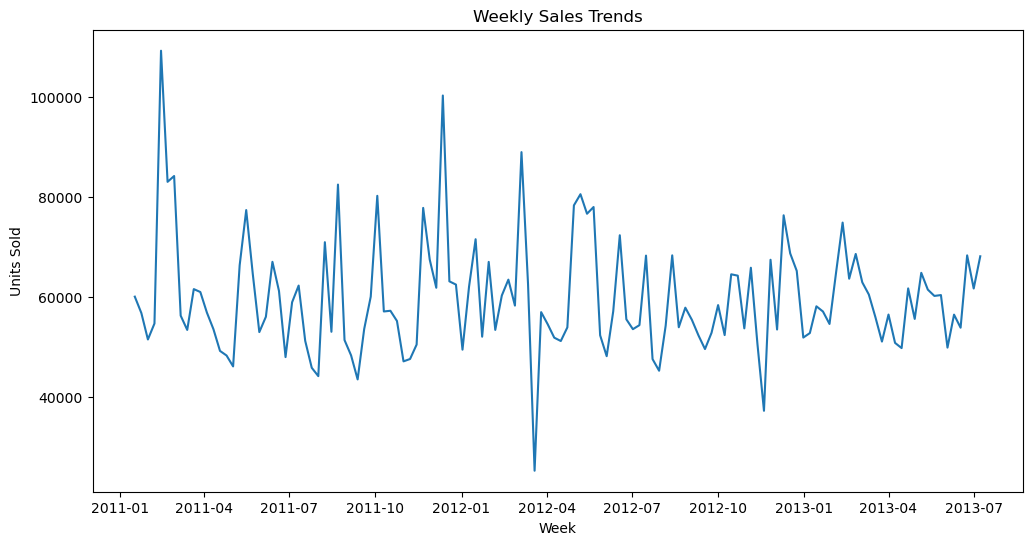

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize weekly sales trends
plt.figure(figsize=(12, 6))
sns.lineplot(x='week', y='units_sold', data=weekly_sales)
plt.title('Weekly Sales Trends')
plt.xlabel('Week')
plt.ylabel('Units Sold')
plt.show()
